# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="../LEGO Notebook and Data (start)/assets/bricks.jpg" style="width: 80vw;">

---------

# Import Statements

In [2]:
import pandas as pd 
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [3]:
colors_df = pd.read_csv(r"./data/colors.csv").rename(columns={'id': 'ID', 'name': 'NAME', 'is_trans': 'IS_TRANS', 'rgb': 'RGB'})
colors_df.head()

,ID,NAME,RGB,IS_TRANS
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [4]:
colors_df.isna().values.any()

np.False_

In [5]:
print("Number of Unique numbers include in df:")
pd.DataFrame(data={colors_df['NAME'].nunique()}, index=None, columns=['NUM_COLOR_COUNT'])

Number of Unique numbers include in df:


,NUM_COLOR_COUNT
0,135


## transparent Vs. opaque counts

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

### first approach

In [6]:
colors_df.groupby('IS_TRANS')['IS_TRANS'].count().to_frame().rename(columns= {'IS_TRANS': 'COUNT'})

,COUNT
IS_TRANS,
f,107
t,28


### second approach

In [7]:
f_num = colors_df[colors_df['IS_TRANS'] == 'f']['IS_TRANS'].count()
t_num = colors_df[colors_df['IS_TRANS'] == 't']['IS_TRANS'].count()
pd.DataFrame(data={f_num, t_num}, index=['f', 't'], columns=['COUNT'])

,COUNT
f,107
t,28


### third approach


In [8]:
colors_df['IS_TRANS'].value_counts().to_frame()

,count
IS_TRANS,
f,107
t,28


### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png" style="width: 90vw;">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png" style="width: 90vw;"> 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [9]:
sets_df = pd.read_csv("./data/sets.csv")

In [10]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [11]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [12]:
first_year = sets_df['year'].min()
first_year

np.int64(1949)

In [13]:
sets_df['year'].value_counts().sort_index().head(1)

year
1949    5
Name: count, dtype: int64

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [14]:
first_year_releases = sets_df[ sets_df['year'] == first_year ]
first_year_releases 

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [15]:
sets_df.sort_values('num_parts', ascending=False).max().to_frame().rename(columns={0:'MAXIMUM PARTS DATA'})

,MAXIMUM PARTS DATA
set_num,wwgp1-1
name,{Roadplates and Scenery}
year,2021
theme_id,709
num_parts,9987


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [16]:
sets_by_year = sets_df.groupby('year').count()
sets_by_year['set_num'][:-1]

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2016    757
2017    786
2018    816
2019    840
2020    674
Name: set_num, Length: 70, dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

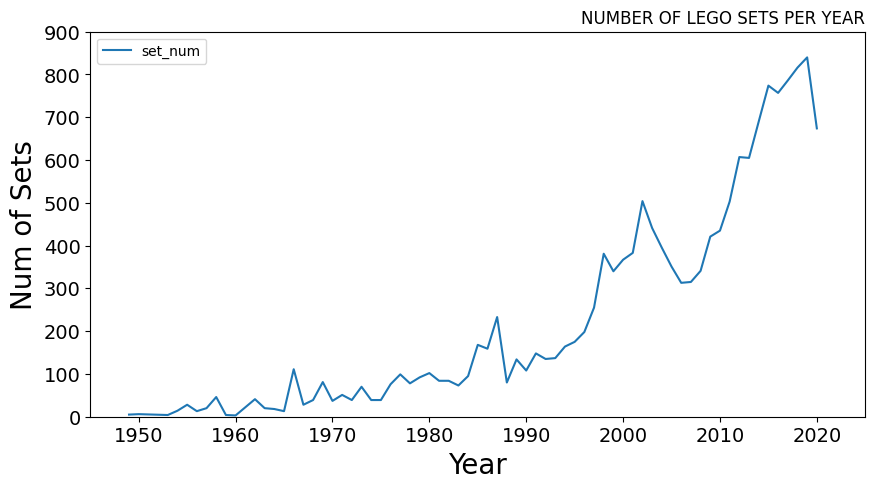

In [17]:
plt.figure(figsize=(10, 5))
plt.xlabel('Year', fontsize= 20)
plt.ylabel('Num of Sets', fontsize= 20)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.ylim(0, 900)
plt.xlim(1945, 2025)
plt.title('number of lego sets per year'.upper(), loc='right')

plt.plot(
    sets_by_year['set_num'][:-1].index, # X
    sets_by_year['set_num'][:-1], # Y
    data= sets_by_year['set_num'],
)
plt.legend()

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [18]:
sets_df

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [19]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

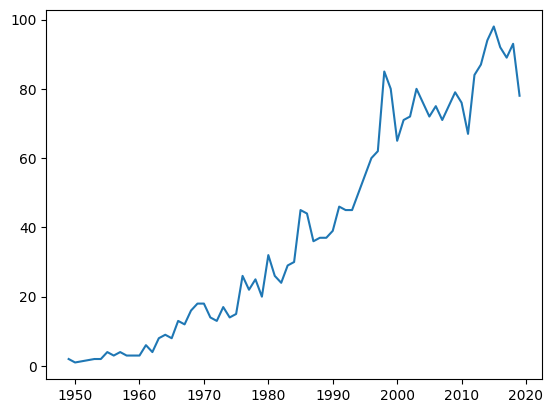

In [20]:
plt.plot(
    themes_by_year['theme_id'][:-2].index,
    themes_by_year['theme_id'][:-2],
    data= themes_by_year['theme_id'][:-2]
)

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Num of Themes')

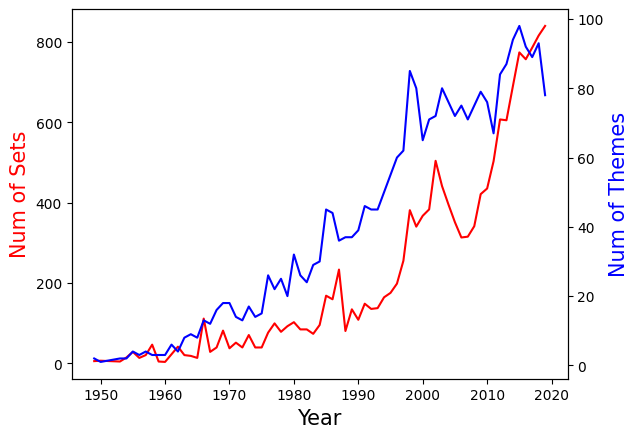

In [21]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(
    sets_by_year[:-2].index,
    sets_by_year['set_num'][:-2],
    data= sets_by_year['set_num'][:-2],
    color= 'red'
)
ax2.plot(
    themes_by_year[:-2].index,
    themes_by_year['theme_id'][:-2],
    data= themes_by_year['theme_id'][:-2],
    color= 'blue'
)
ax1.set_xlabel('Year', fontsize= 15)
ax1.set_ylabel('Num of Sets', fontsize= 15, color='red')
ax2.set_ylabel('Num of Themes', fontsize= 15, color='blue')


**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

### our first approach

In [22]:
temp = sets_df[['num_parts', 'year', 'theme_id']].groupby("year").agg({'num_parts': 'sum', 'theme_id': 'count',})
parts_per_set = temp['num_parts'] / temp['theme_id']
parts_per_set.to_frame().rename(columns={0: 'Parts per Sets'})

,Parts per Sets
year,
1949,99.60
1950,1.00
1953,13.50
1954,12.36
1955,36.61
...,...
2017,221.84
2018,213.62
2019,207.51


### Course solution


In [23]:
parts_per_set_course = sets_df.groupby('year').agg({'num_parts': 'mean'}).rename(columns={'num_parts': 'Parts per Sets'})
parts_per_set_course

,Parts per Sets
year,
1949,99.60
1950,1.00
1953,13.50
1954,12.36
1955,36.61
...,...
2017,221.84
2018,213.62
2019,207.51


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

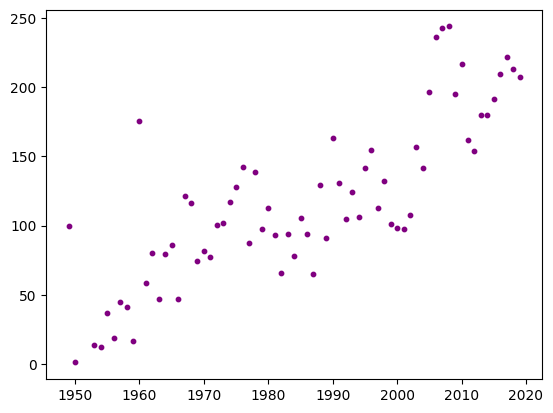

In [24]:
plt.scatter(
    parts_per_set_course[:-2].index,
    parts_per_set_course['Parts per Sets'][:-2],
    s= 10,
    c= "purple",
    
)

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [25]:
set_theme_count = sets_df['theme_id'].value_counts().to_frame()
set_theme_count.head()

,count
theme_id,
158,753
501,656
494,398
435,356
503,329


<img  style="width= 60vw;" src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [26]:
themes_df = pd.read_csv("./data/themes.csv")
themes_df[themes_df['name'] == 'Star Wars']


,id,name,parent_id
17,18,Star Wars,1.00
150,158,Star Wars,NaN
174,209,Star Wars,207.00
211,261,Star Wars,258.00


In [27]:
sets_df[sets_df['theme_id'] == 158].sort_values('year')

,set_num,name,year,theme_id,num_parts
10735,7171-1,Mos Espa Podrace,1999,158,913
10713,7161-1,Gungan Sub,1999,158,379
10632,7130-1,Snowspeeder,1999,158,217
10693,7140-1,X-wing Fighter,1999,158,271
10704,7151-1,Sith Infiltrator,1999,158,244
...,...,...,...,...,...
14092,912064-1,Mini Sith Eternal TIE Dagger,2020,158,37
6993,5006290-1,Yoda's Lightsaber,2020,158,140
14086,912058-1,Darth Maul's Sith Infiltrator,2020,158,34
3139,30386-1,Poe Dameron's X-wing Fighter,2020,158,72


### Merging (i.e., Combining) DataFrames based on a Key


In [35]:
set_theme_count= pd.DataFrame(
    data={
        'id': set_theme_count.index,
        'set_count': set_theme_count['count'],
    }
)
set_theme_count

,id,set_count
theme_id,,
158,158,753
501,501,656
494,494,398
435,435,356
503,503,329
...,...,...
512,512,1
370,370,1
34,34,1


In [38]:
merged_df = pd.merge(
    left= set_theme_count,
    right= themes_df,
    on= 'id'
)
merged_df.sort_values('set_count', ascending=False)

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.00
...,...,...,...,...
566,512,1,Castle,507.00
567,370,1,Mosaic,365.00
568,34,1,Building,23.00
569,475,1,Western,NaN


## Creating a Bar Chart

<BarContainer object of 20 artists>

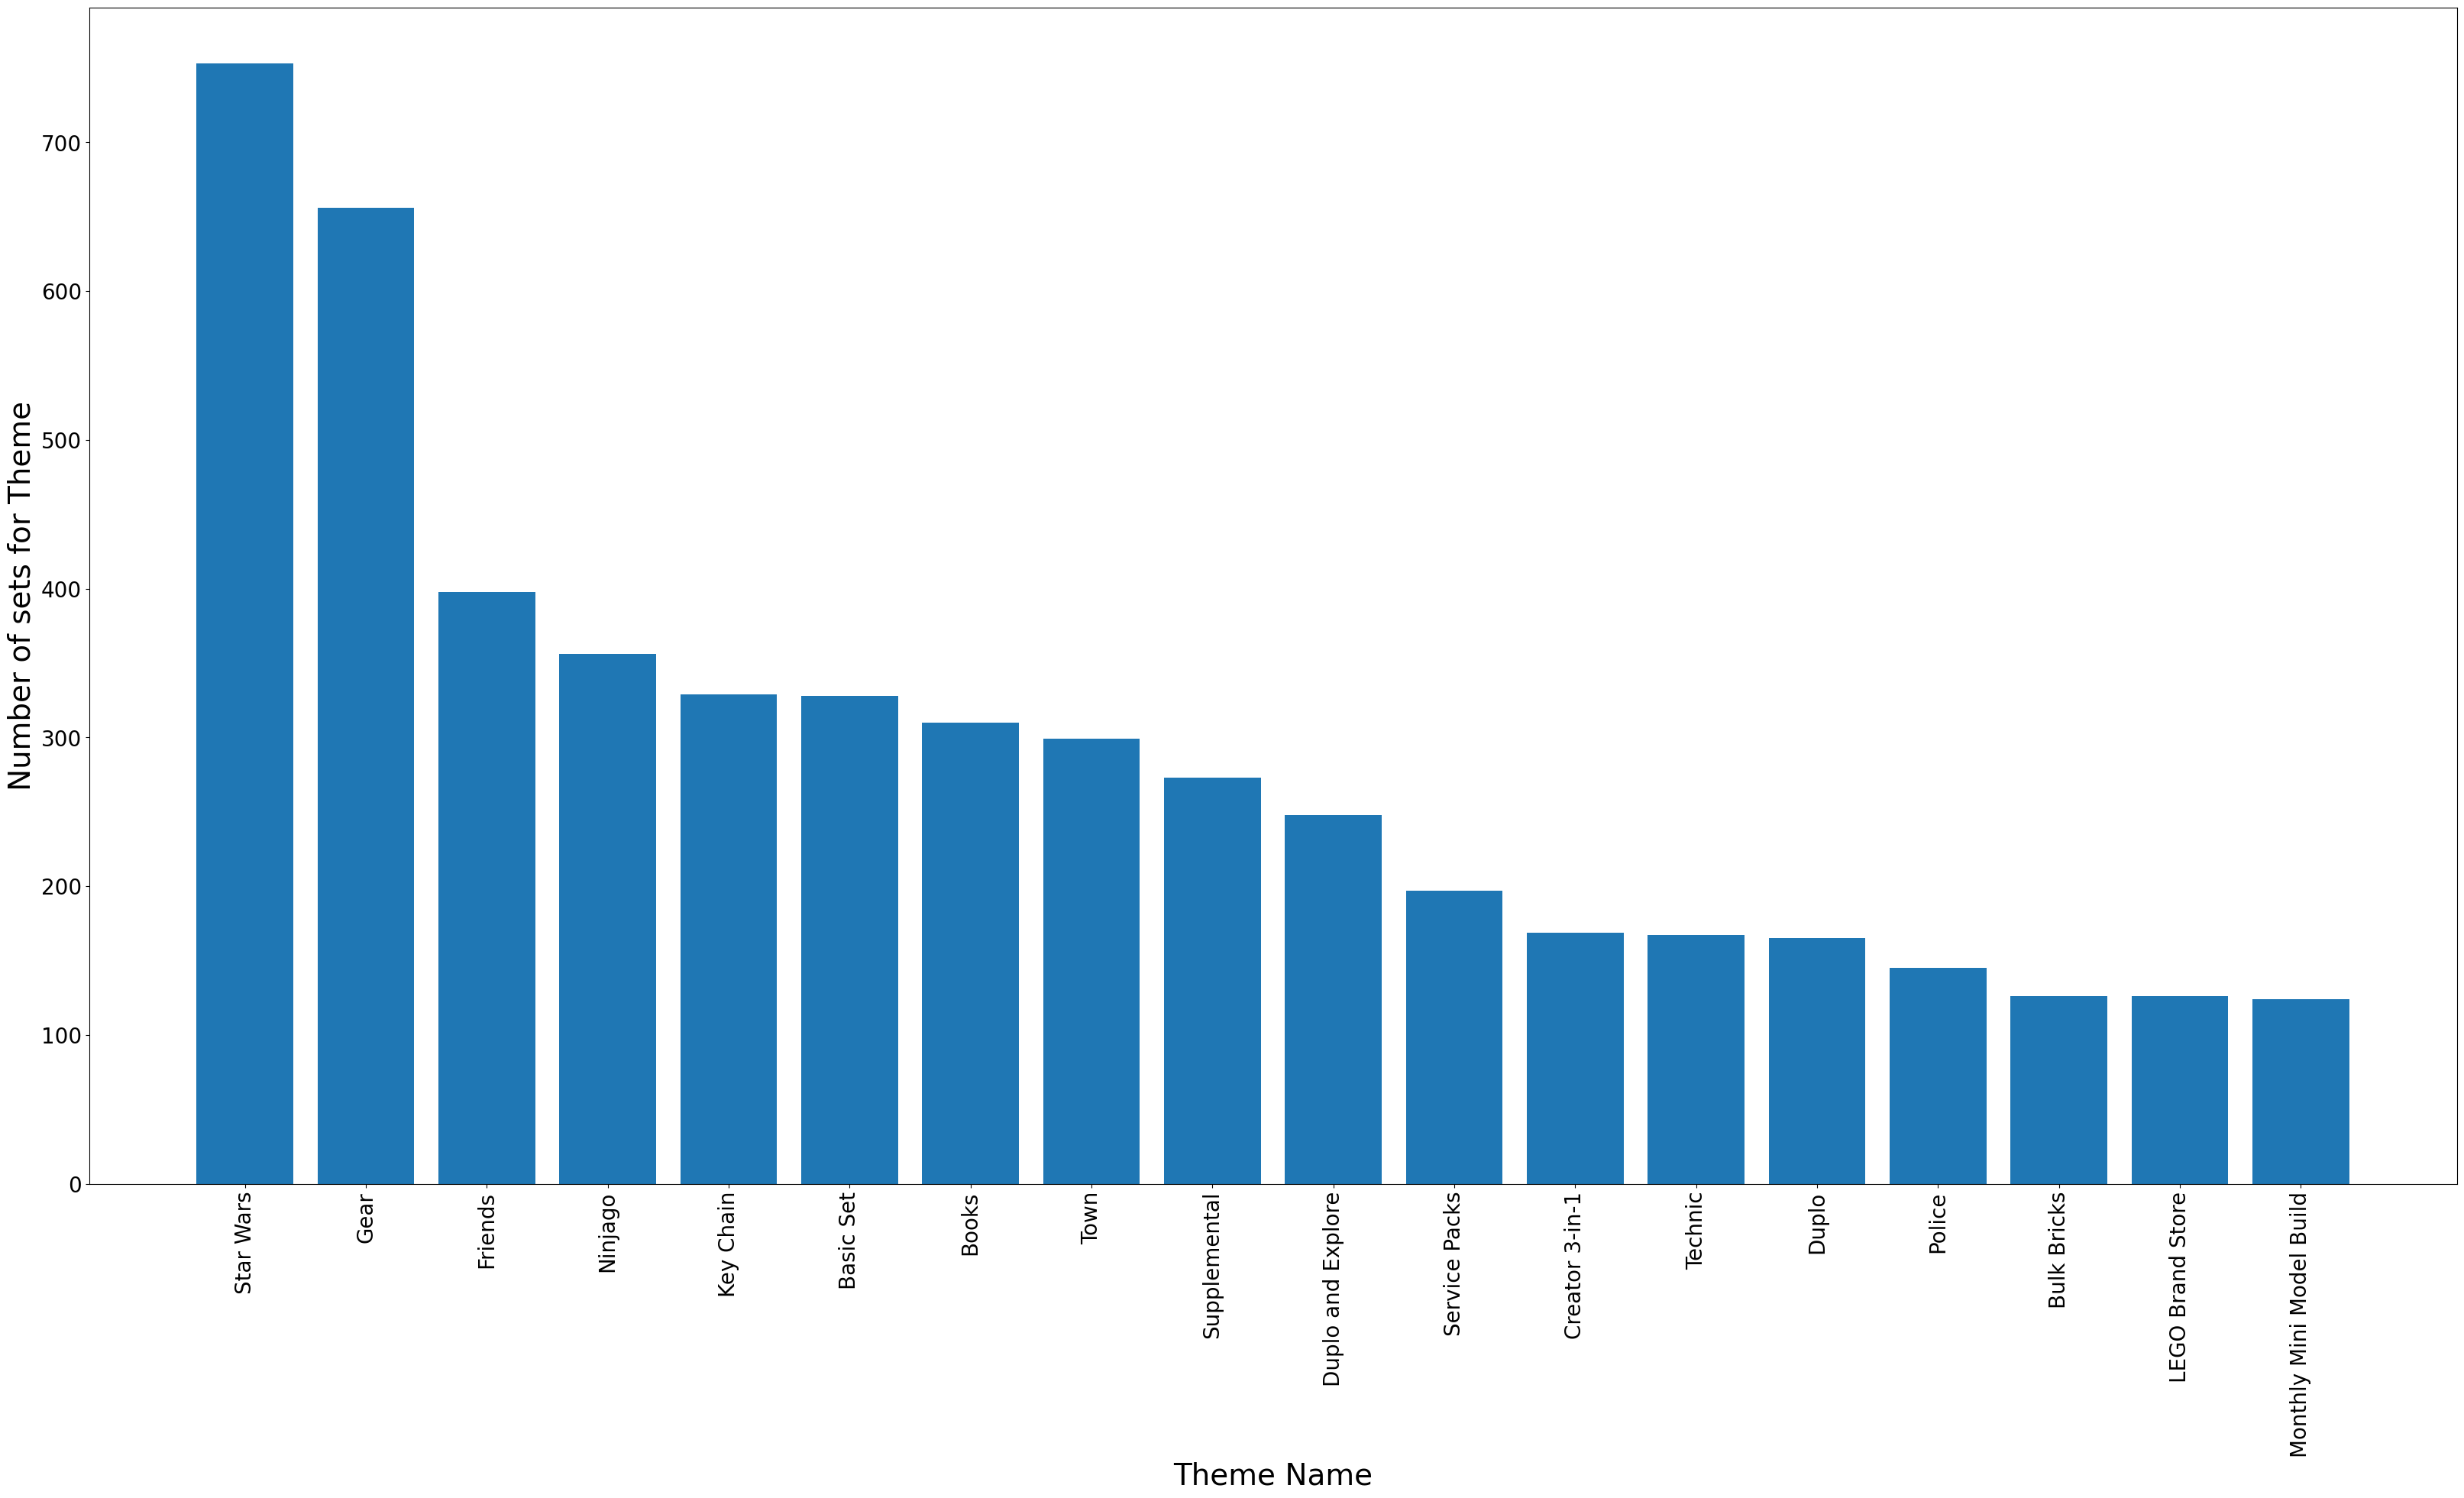

In [67]:
plt.figure(figsize= (40,20))
plt.xlabel('Theme Name', fontsize=28)
plt.ylabel('Number of sets for Theme', fontsize=28)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.bar(
    x= merged_df['name'][:20],
    height= merged_df['set_count'][:20],
    width= 0.8,

)